## validation data를 기준으로 모델의 prediction 결과를 분석하는 EDA 파일입니다.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# 원하는 csv파일의 경로로 수정해주세요
csv_path = "../results/05-09-17-01-34/val_result.csv"

val_result_df = pd.read_csv(csv_path)
val_result_df['correct'] = val_result_df['target'] == val_result_df['predict']

In [3]:
# 틀린 데이터 확인
val_result_df[val_result_df['correct'] == False].head(10)

,Unnamed: 0,sentence,target,predict,correct
0,0,카로이 2세 1345년 카를로 3세 ( 1345년 ~ 1386년 2월 24일 ) 또...,per:date_of_birth,no_relation,False
7,7,"스탈린 스탈린은 이 군들의 지휘를 맡겼고, 또란 예비 군대 5개 군을 지휘 가능하게...",per:colleagues,no_relation,False
8,8,"K리그 한국프로축구연맹 한국프로축구연맹은 26일 "" 오늘 저녁 8시 서울월드컵경기장...",no_relation,org:member_of,False
9,9,혜공왕 경덕왕 신라 경덕왕이 아버지인 성덕왕의 공덕을 널리 알리기 위해 종을 만들려...,no_relation,per:parents,False
13,13,강성훈 젝스키스 젝스키스는 올해 신곡 활동을 예고했지만 강성훈 씨 탈퇴와 YG 계약...,no_relation,per:employee_of,False
17,17,전북 KSPO WK리그 2012년 WK리그에서는 16승 2무 3패로 정규리그 2위를...,no_relation,org:member_of,False
23,23,최진실 2008년 10월 2일 화려한 재기를 뒤로하고 고 ( 故 ) 안재환에게 돈을...,per:date_of_death,per:date_of_birth,False
27,27,성남 일화 성남시 그러자'성남 연고 사수'여론이 급속 확산되어 지지부진하던 성남 일...,org:place_of_headquarters,org:member_of,False
31,31,"최진영 2010년 3월 29일 2010년 3월 29일, 최진영은 서울특별시 강남구 ...",per:date_of_death,per:date_of_birth,False
34,34,"하후돈 하후연 자는 중권 ( 權 ) 이며, 하후연 ( ) 의 차남 ( 연의에서는 하...",per:other_family,per:parents,False


In [4]:
# 레이블별 정답률 확인
label_stats = pd.DataFrame()
label_counts = val_result_df.groupby('target')['predict'].count()
correct_counts = val_result_df.groupby('target')['predict'].apply(lambda x: (x == x.name).sum())
label_stats['total'] = label_counts
label_stats['correct'] = correct_counts
label_stats['correct_ratio'] = label_stats['correct'] / label_stats['total']
label_stats

,total,correct,correct_ratio
target,,,
no_relation,947,606,0.639916
org:alternate_names,127,108,0.850394
org:dissolved,8,0,0.000000
org:founded,41,36,0.878049
org:founded_by,10,0,0.000000
org:member_of,180,131,0.727778
org:members,51,0,0.000000
org:number_of_employees/members,3,0,0.000000
org:place_of_headquarters,119,86,0.722689


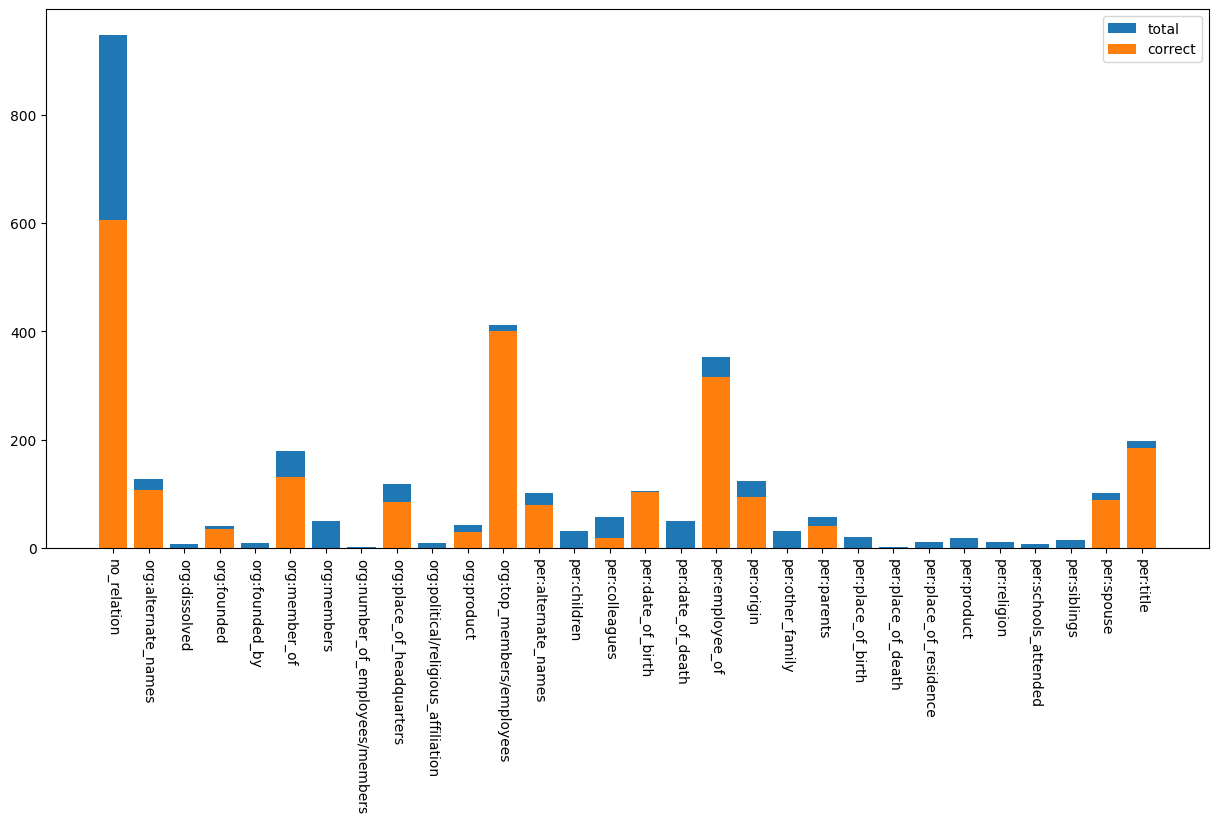

In [5]:
# 레이블 별 총 데이터 개수와 정답 데이터 개수 비교
plt.figure(figsize = (15, 7))
plt.bar(label_stats.index, label_stats['total'], label="total")
plt.bar(label_stats.index, label_stats['correct'], label="correct")
plt.legend()
plt.xticks(rotation=-90)
plt.show()